In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
df=pd.read_csv('employment.csv')

In [14]:
df

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5


In [15]:
df.isnull().any()

datestamp                         False
Agriculture                       False
Business services                 False
Construction                      False
Durable goods manufacturing       False
Education and Health              False
Finance                           False
Government                        False
Information                       False
Leisure and hospitality           False
Manufacturing                     False
Mining and Extraction             False
Nondurable goods manufacturing    False
Other                             False
Self-employed                     False
Transportation and Utilities      False
Wholesale and Retail Trade        False
dtype: bool

In [32]:
df['datestamp'] = pd.to_datetime(df['datestamp'])
df

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5


In [17]:
#1.Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column.  
df.set_index('datestamp',inplace=True)
df

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1


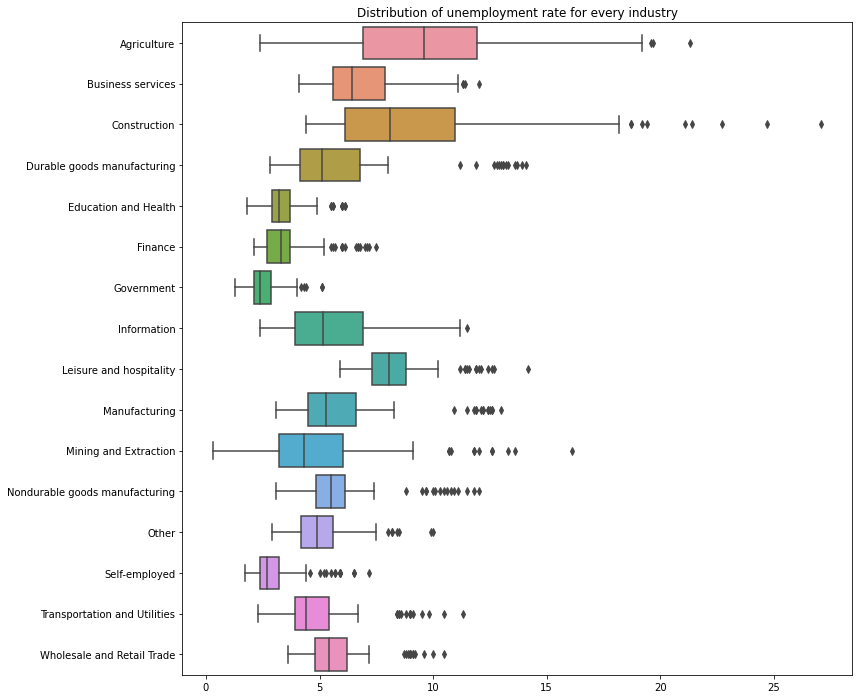

In [18]:
#2.Generate a boxplot to find the distribution of unemployment rate for every industry .
plt.figure(figsize=(12,12))
plt.title('Distribution of unemployment rate for every industry')
boxplot=sns.boxplot(data=df,orient='h')
plt.show()

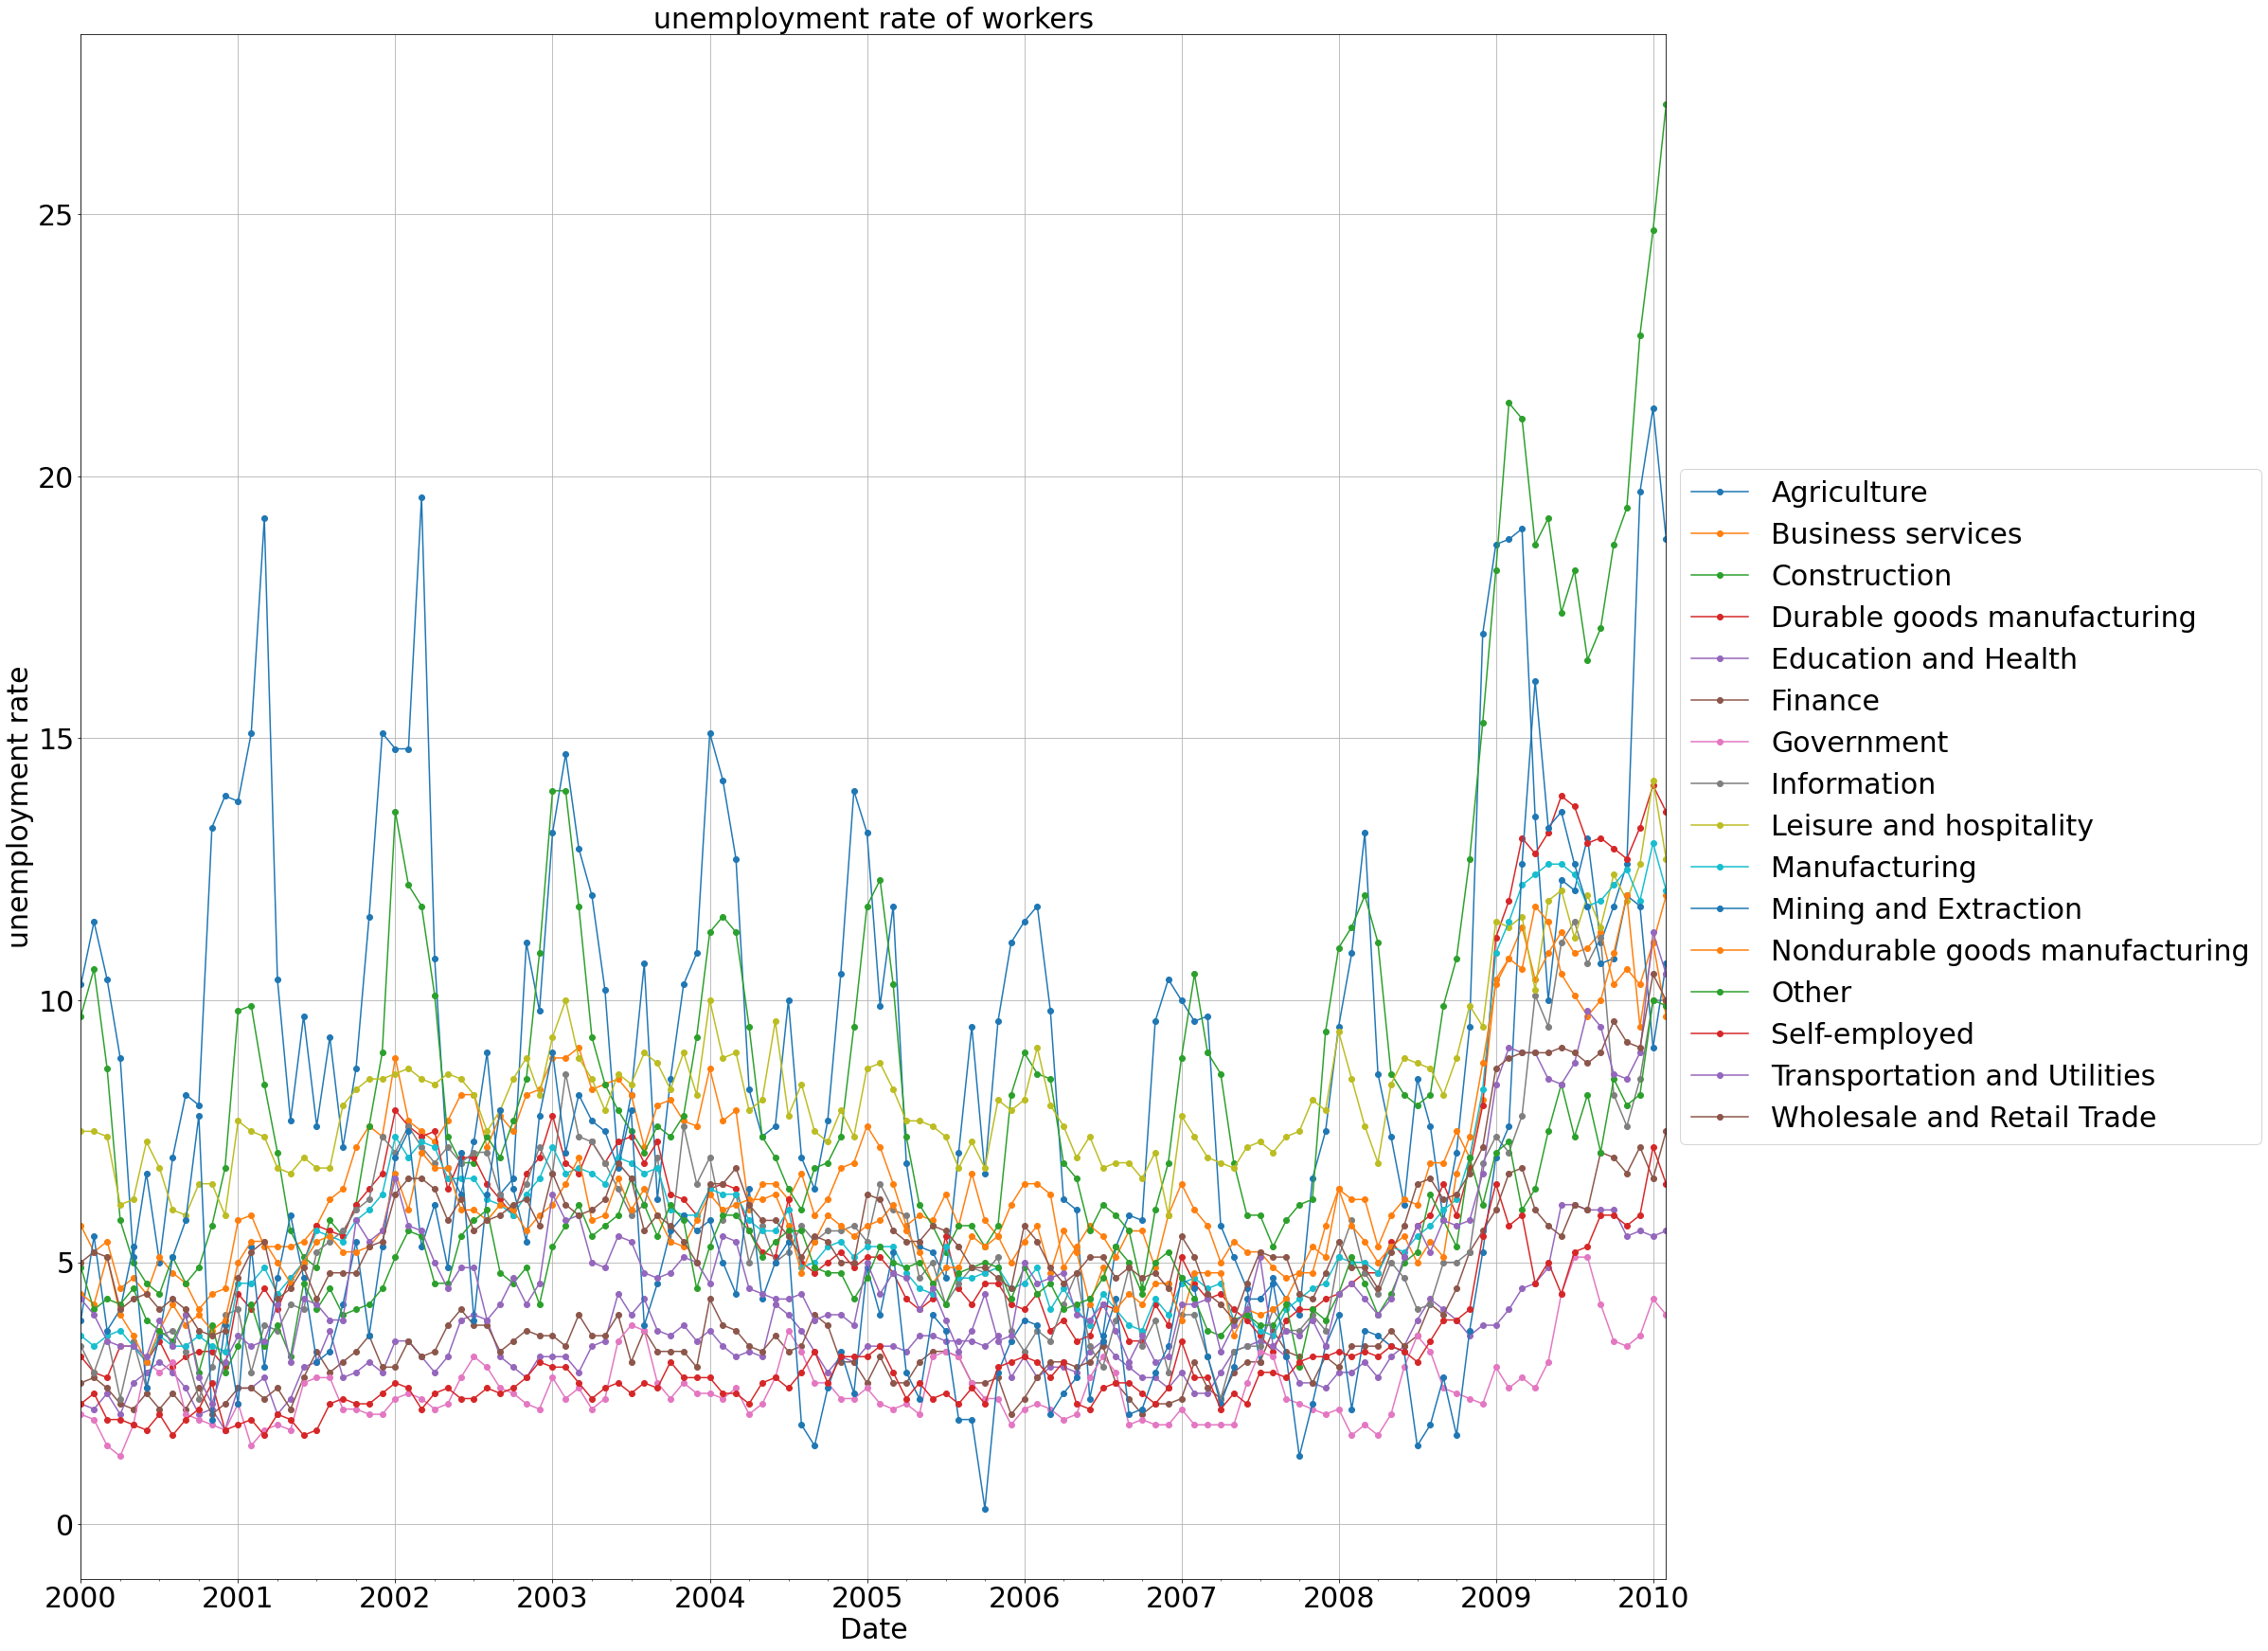

In [19]:
#3.Using line chart Visualize the unemployment rate of workers by industry .
df.plot(figsize=(30,30),marker='o', fontsize=16, linewidth=1.5)
plt.legend(fontsize=30,loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.xlabel('Date',fontsize=30)
plt.ylabel('unemployment rate',fontsize=30)
plt.title('unemployment rate of workers',fontsize=30)
plt.grid(True)
plt.show()

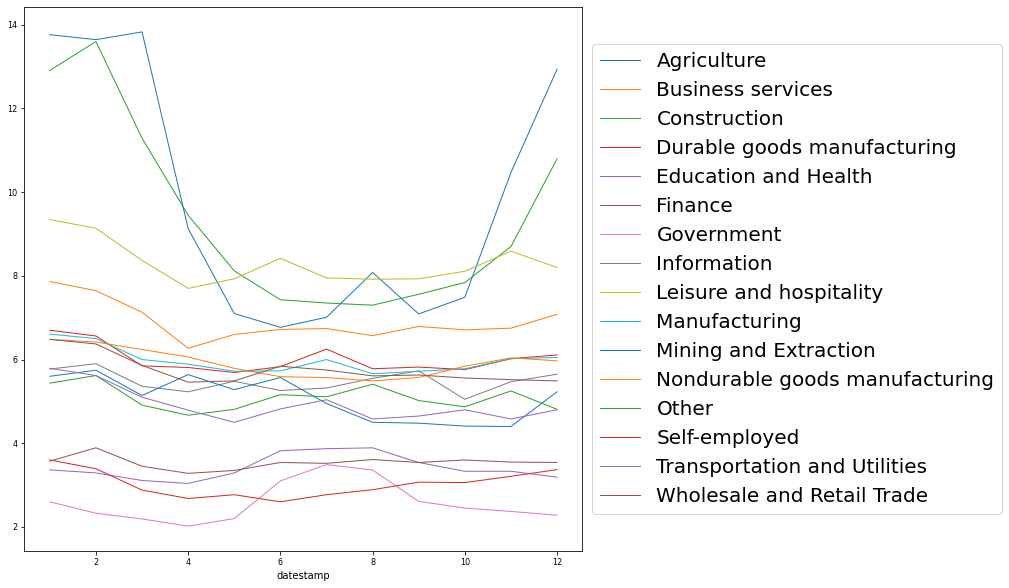

In [61]:
#4.Plot the monthly and yearly trends .
by_month = df.groupby(df.index.month).mean()
ax = by_month.plot(figsize=(10, 10), fontsize=8, linewidth=1)
ax.legend(fontsize=20, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


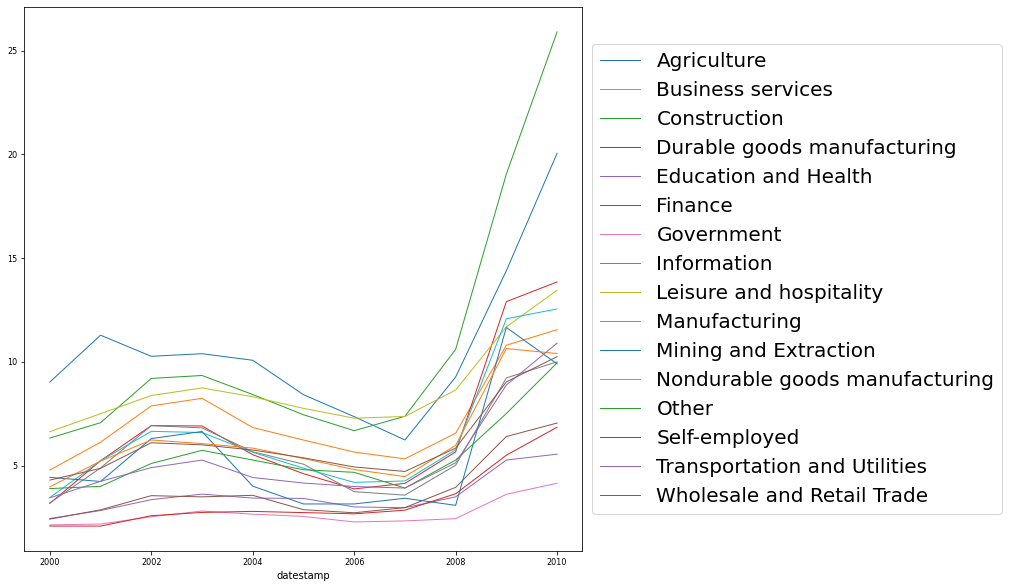

In [62]:
by_year = df.groupby(df.index.year).mean()
ax = by_year.plot(figsize=(10, 10), fontsize=8, linewidth=1)
ax.legend(fontsize=20, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

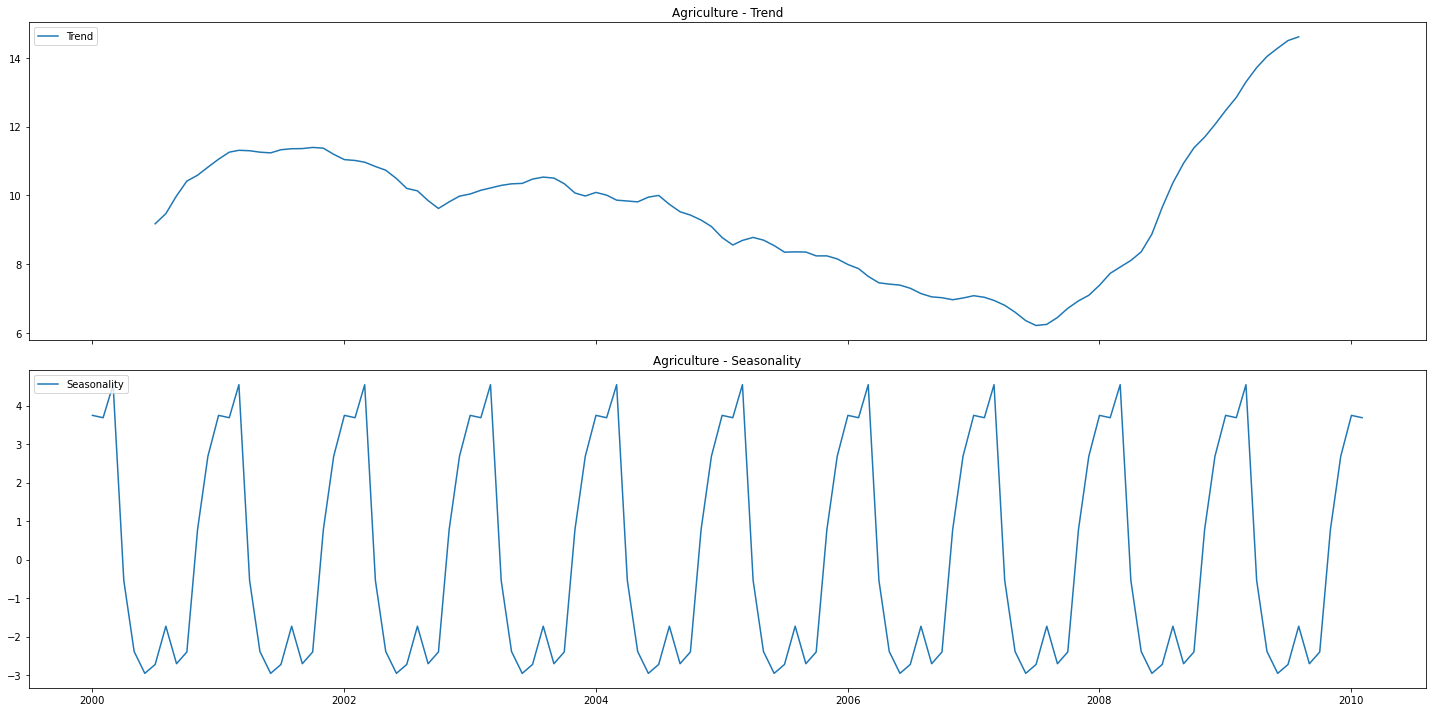

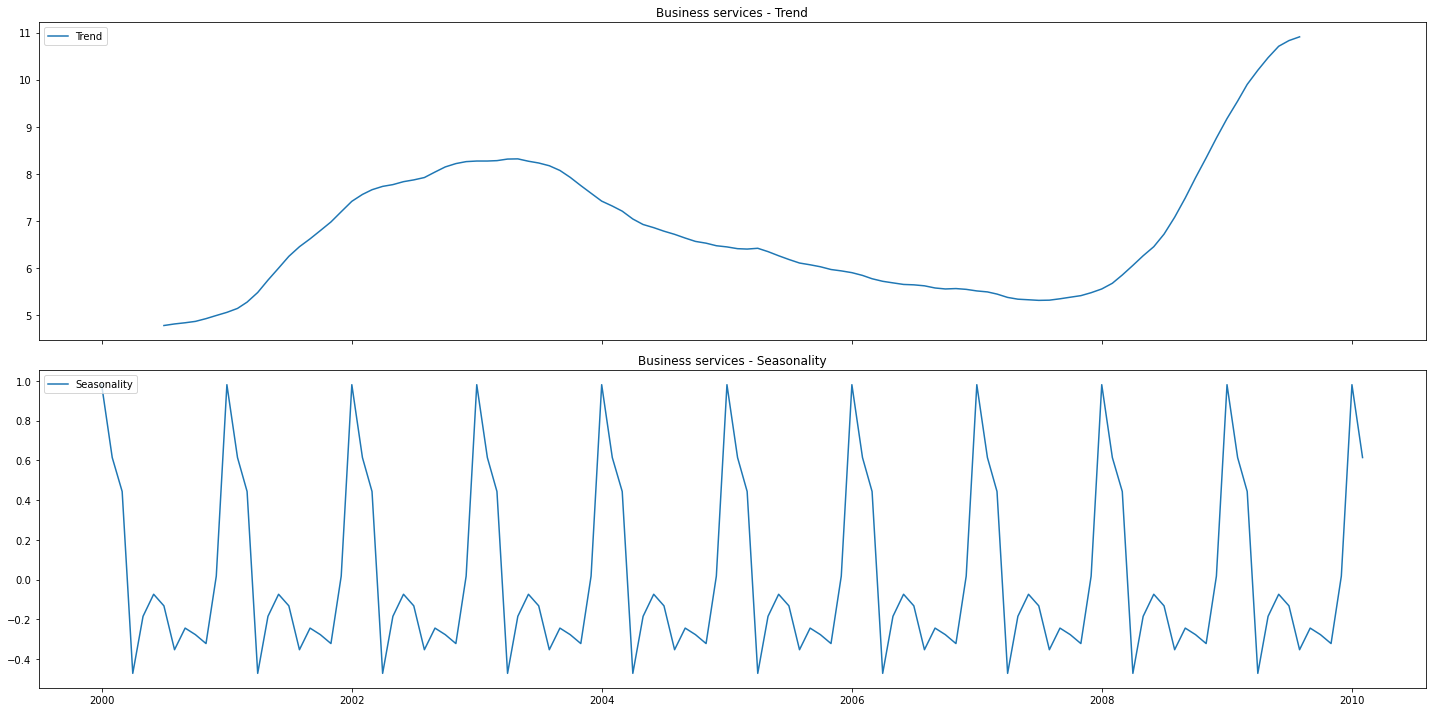

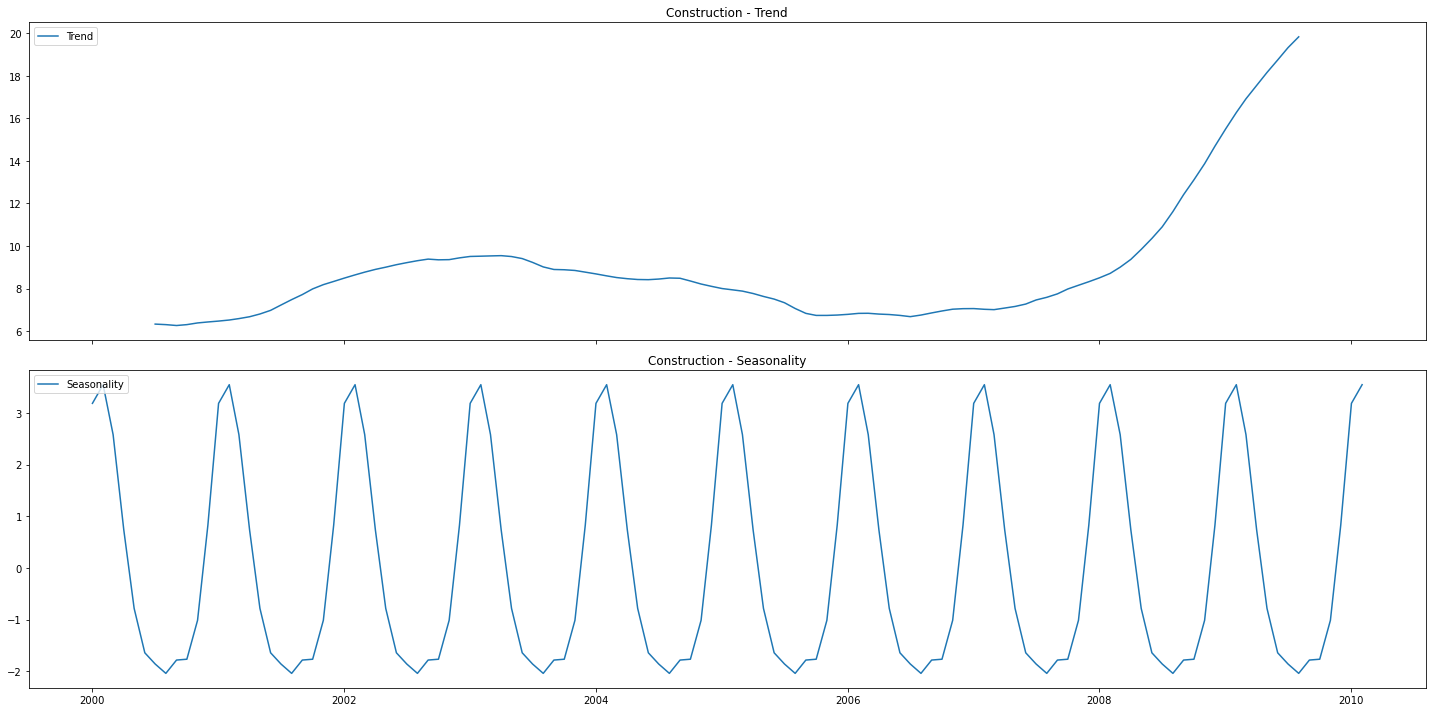

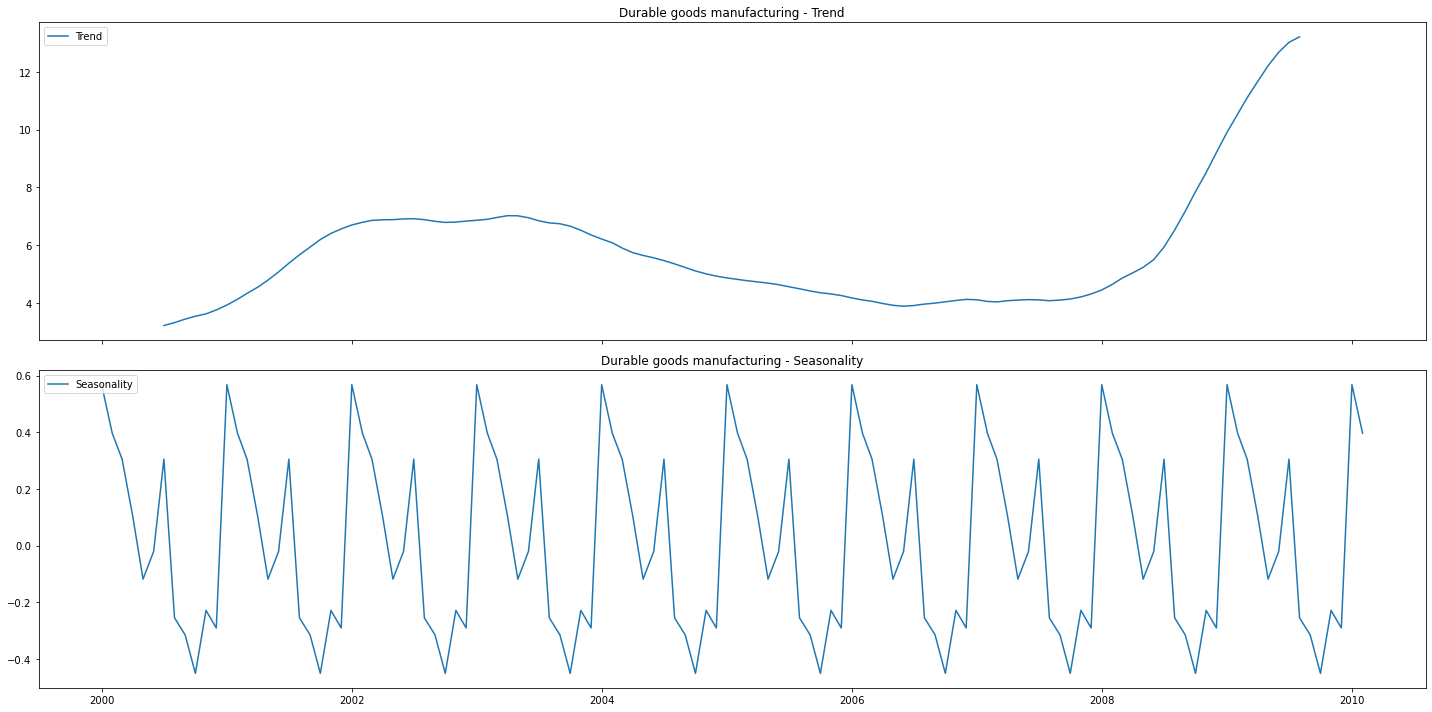

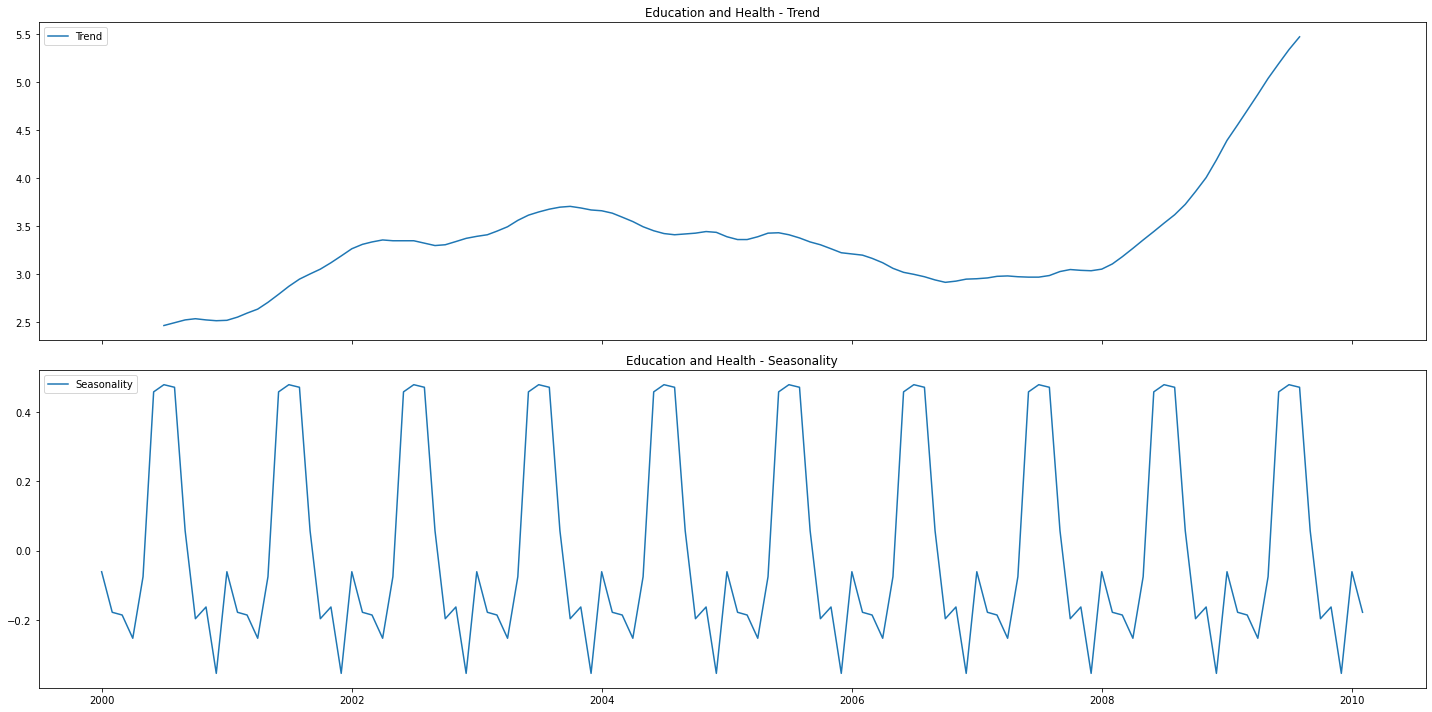

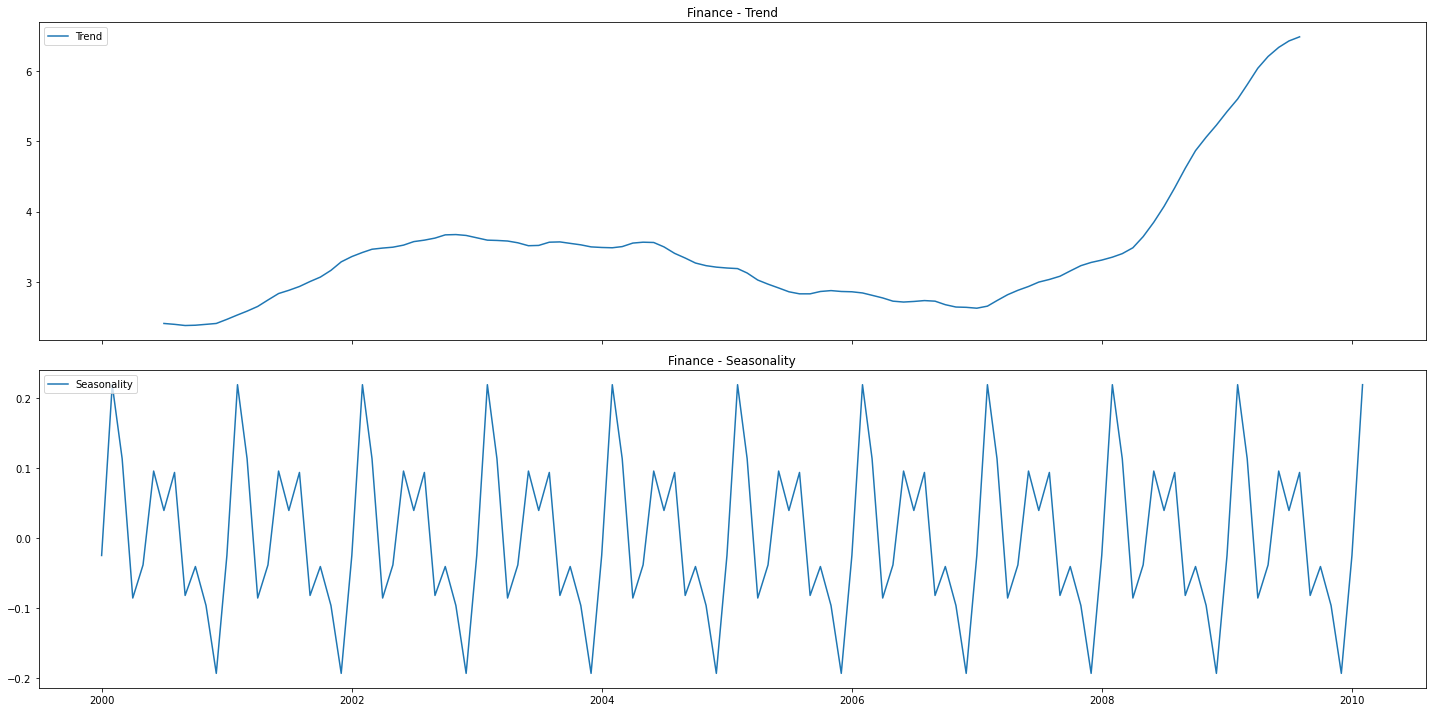

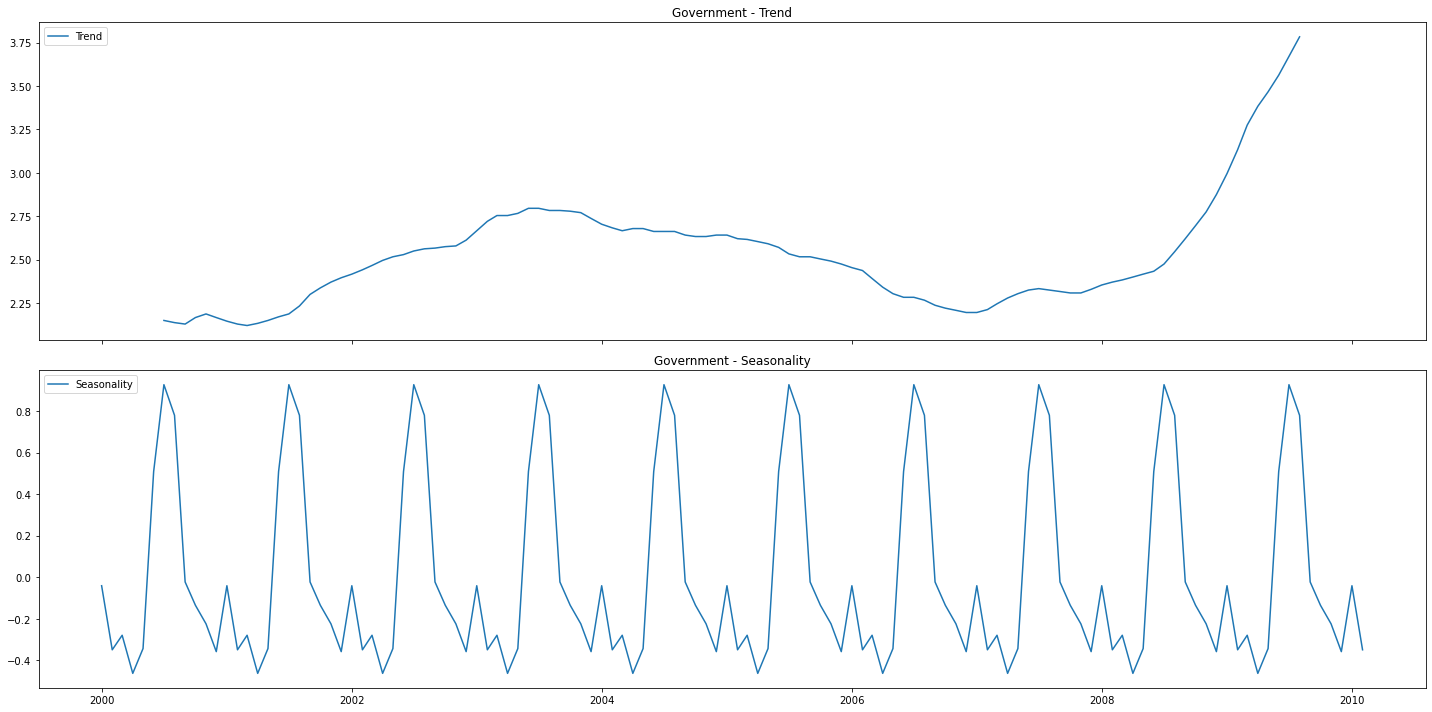

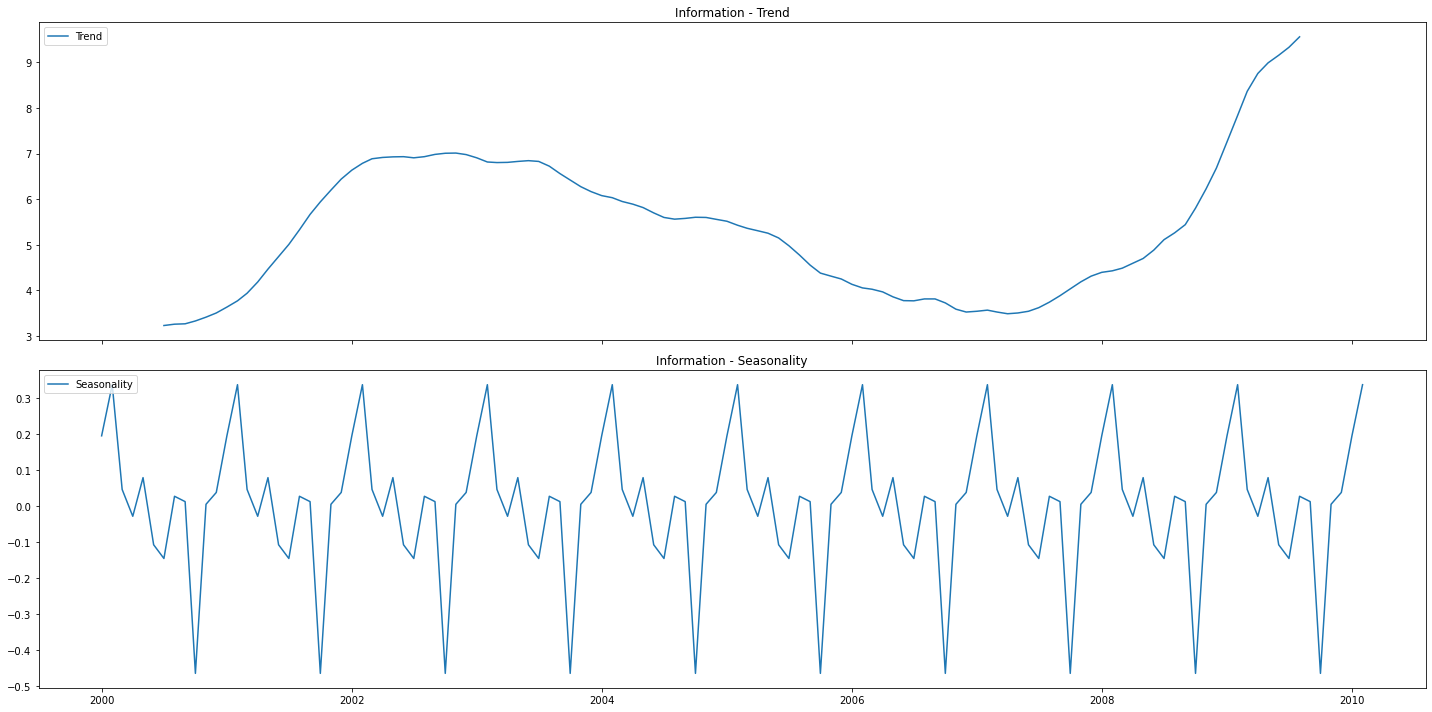

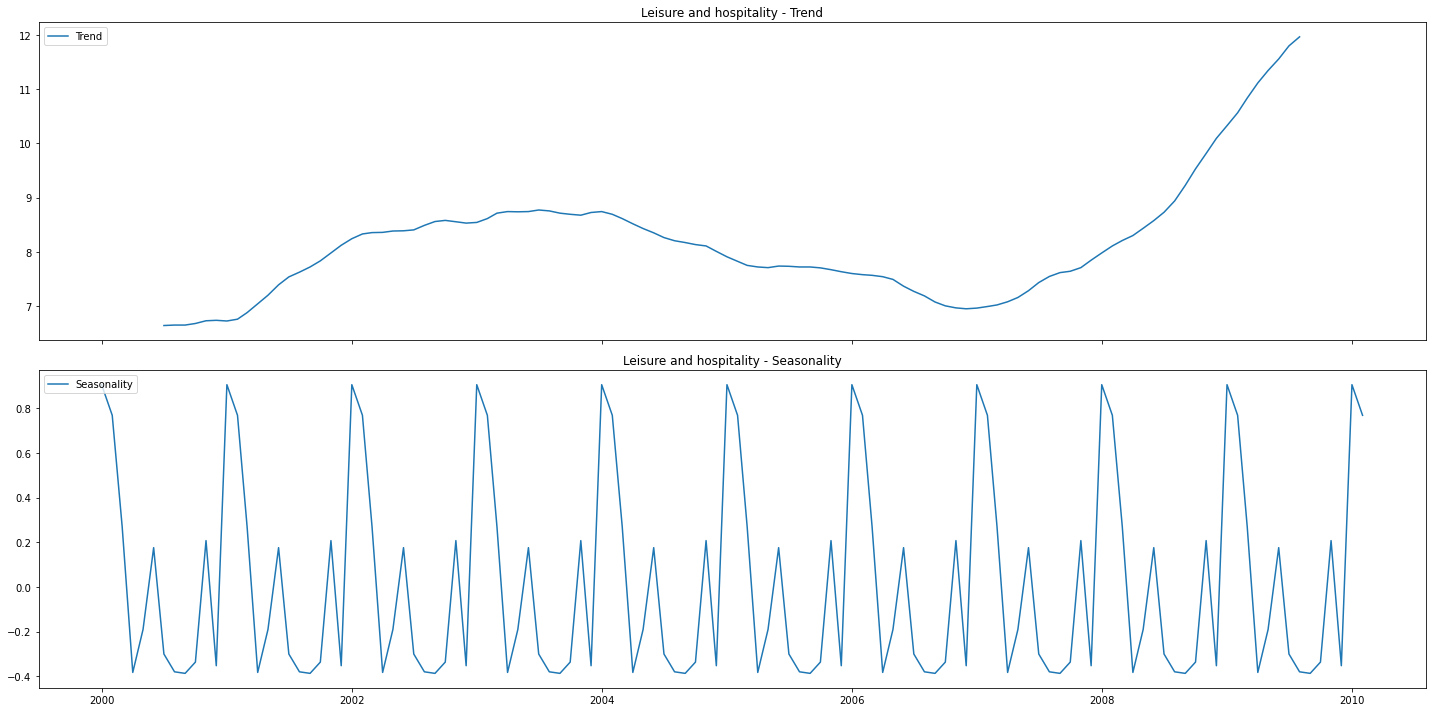

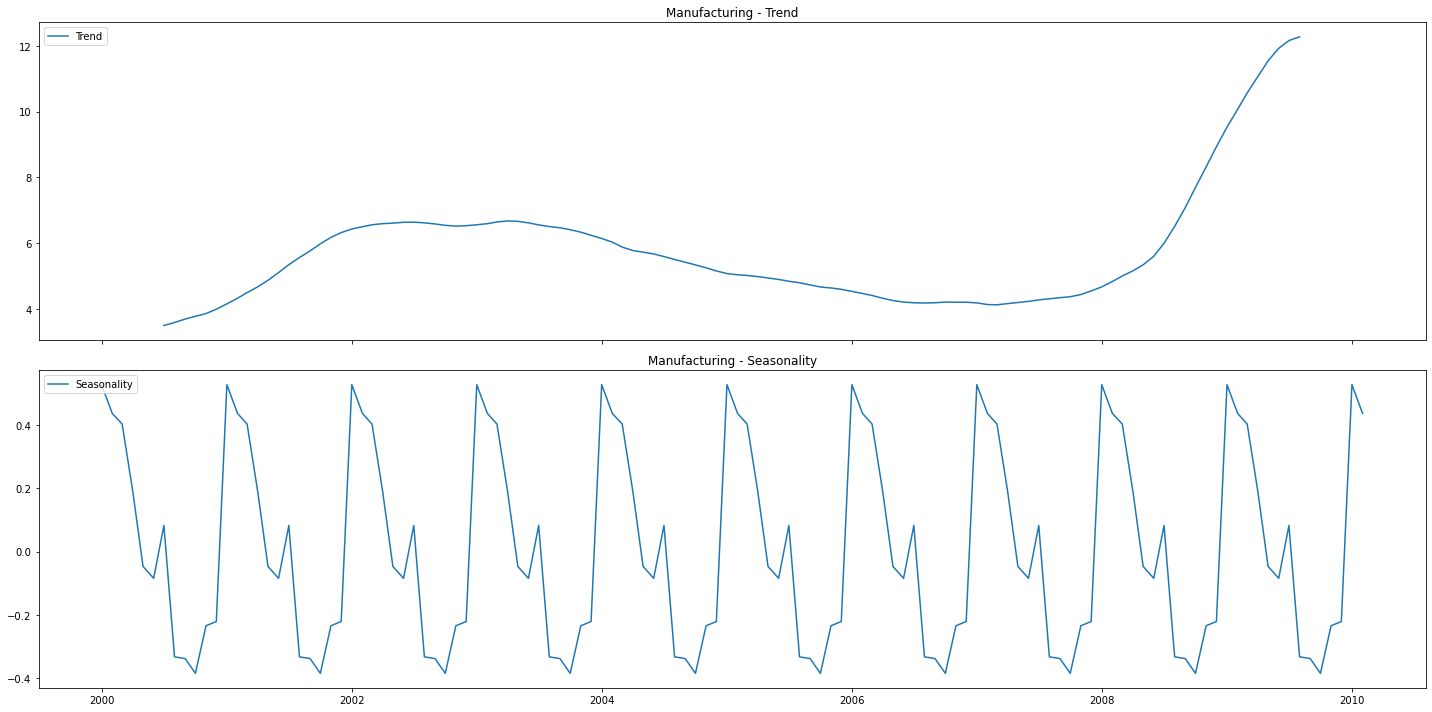

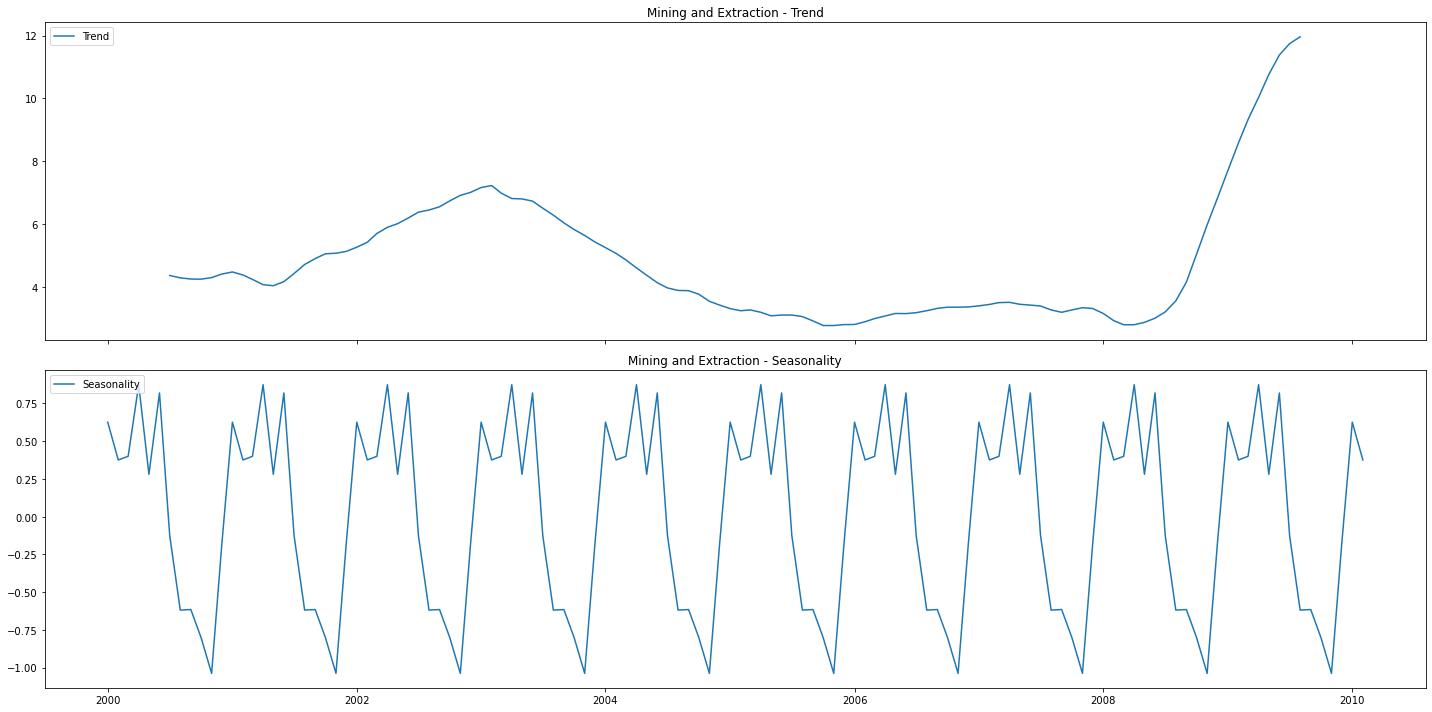

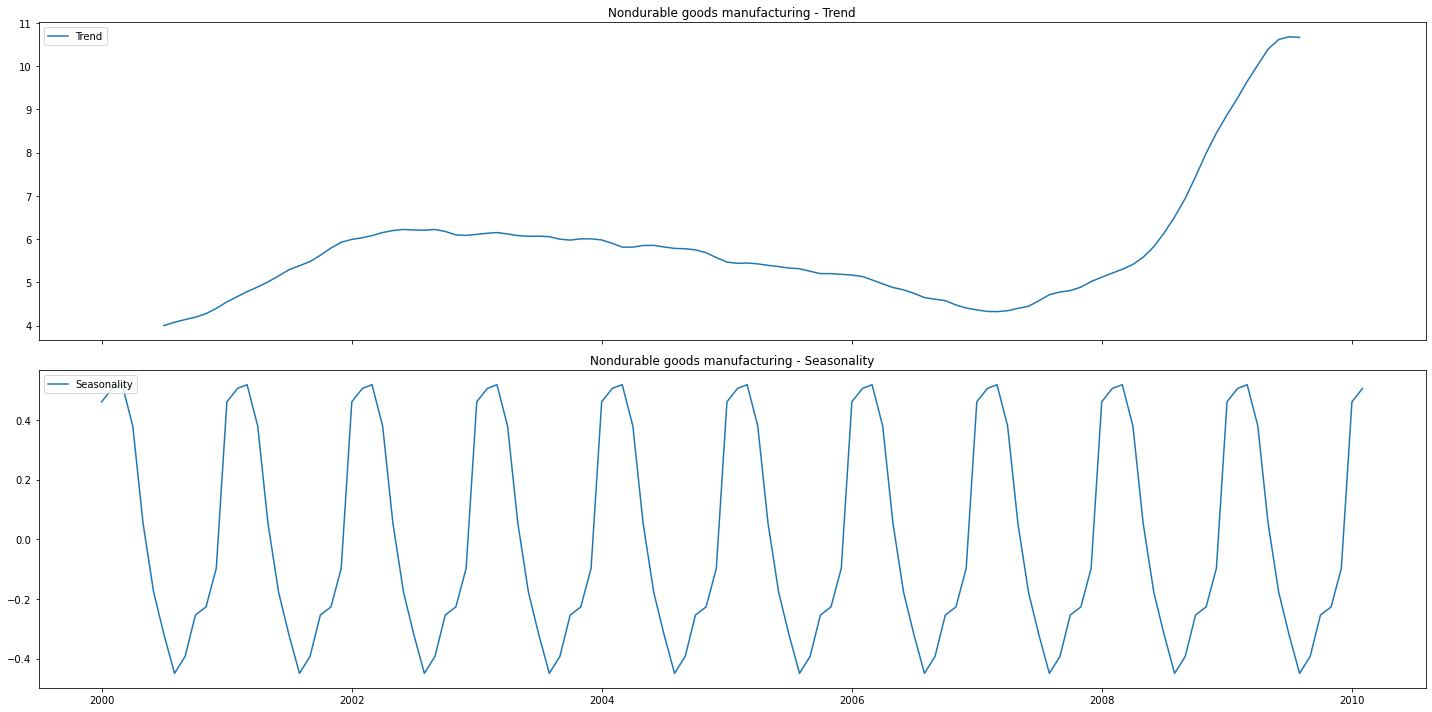

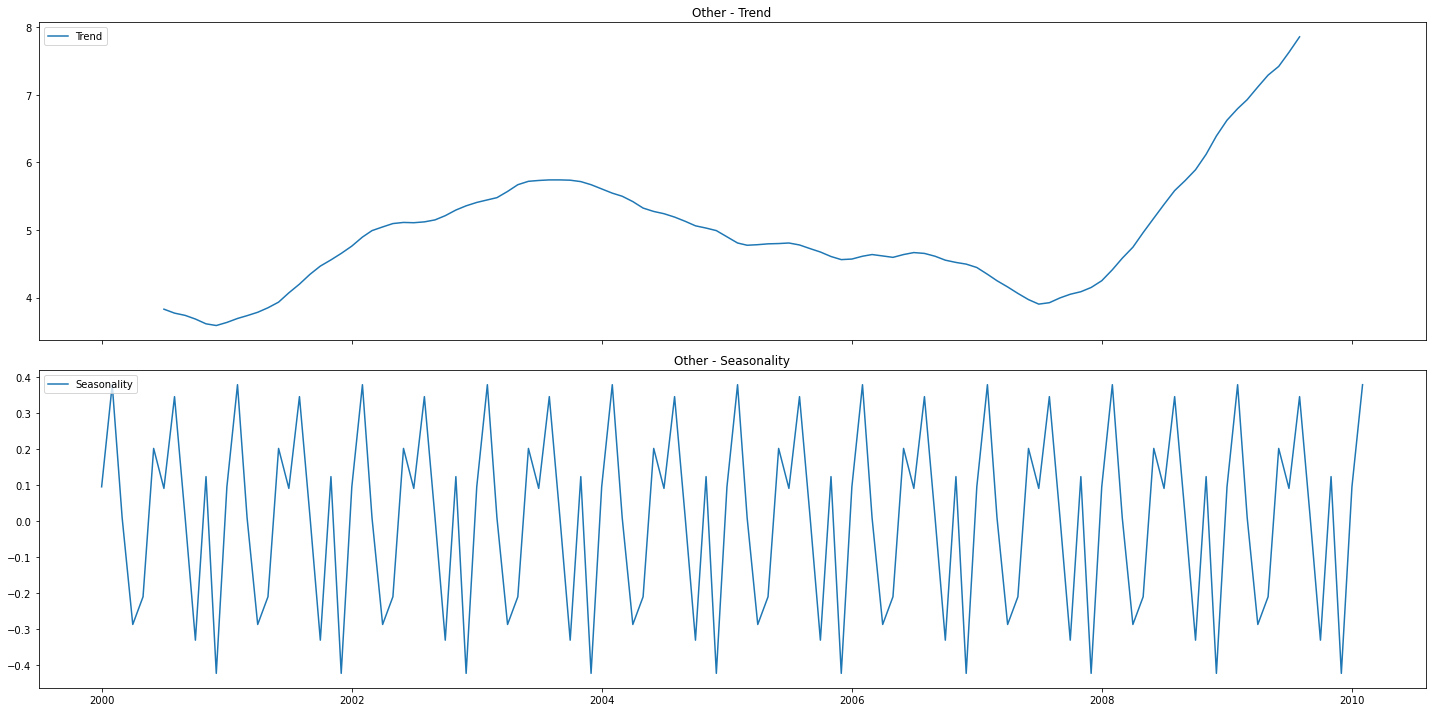

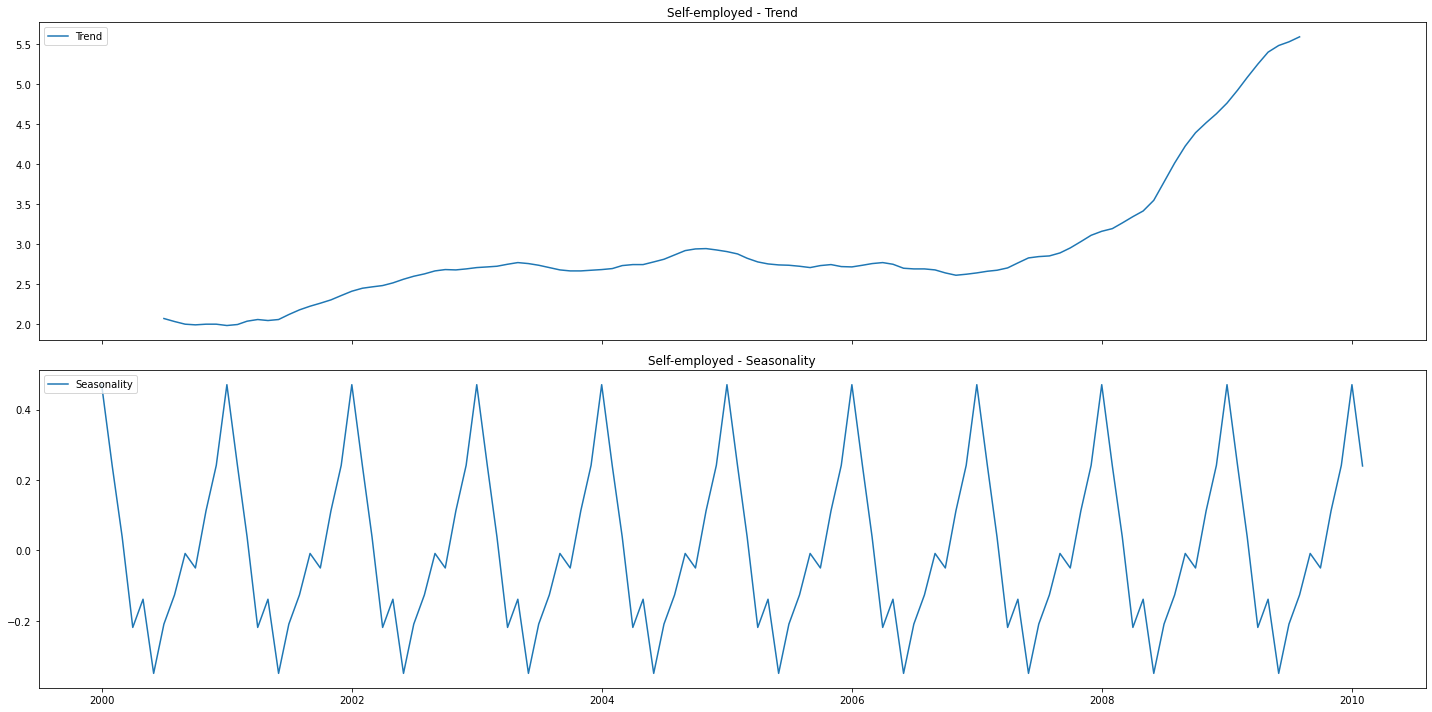

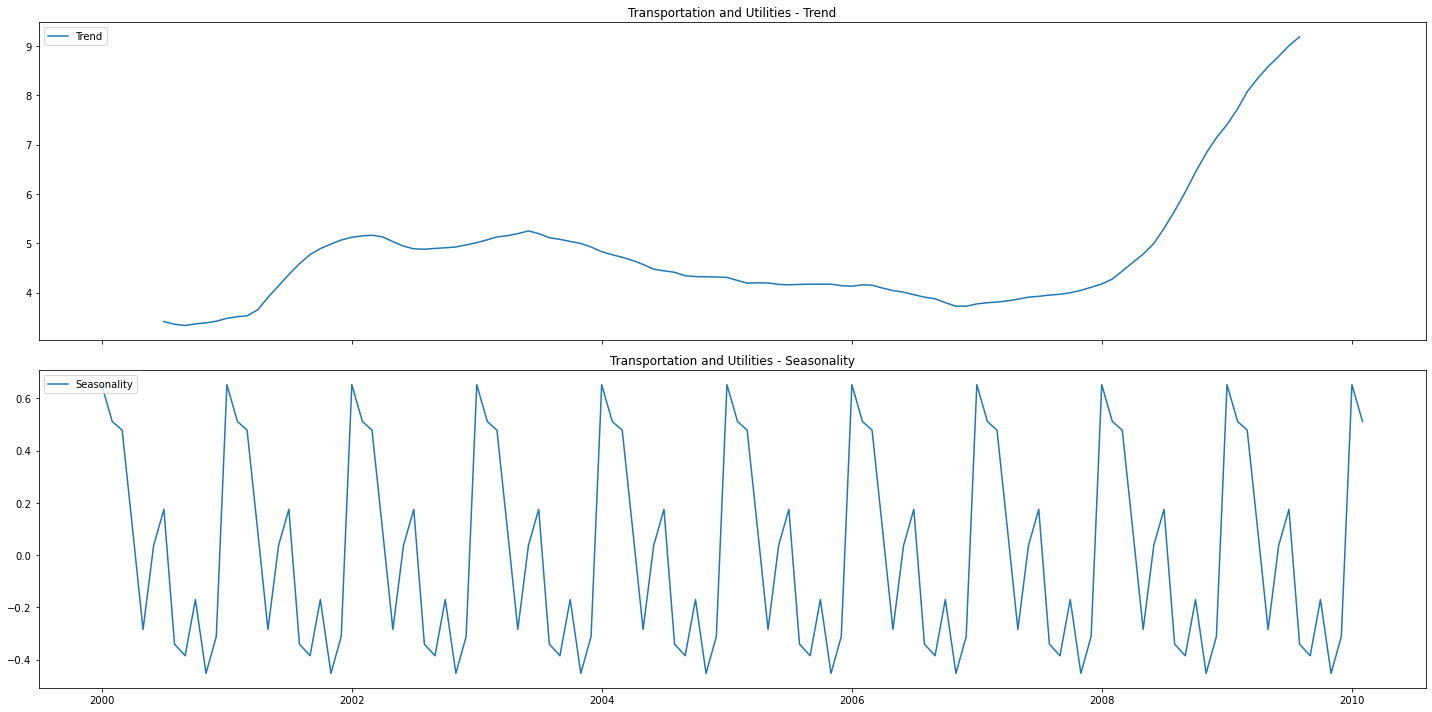

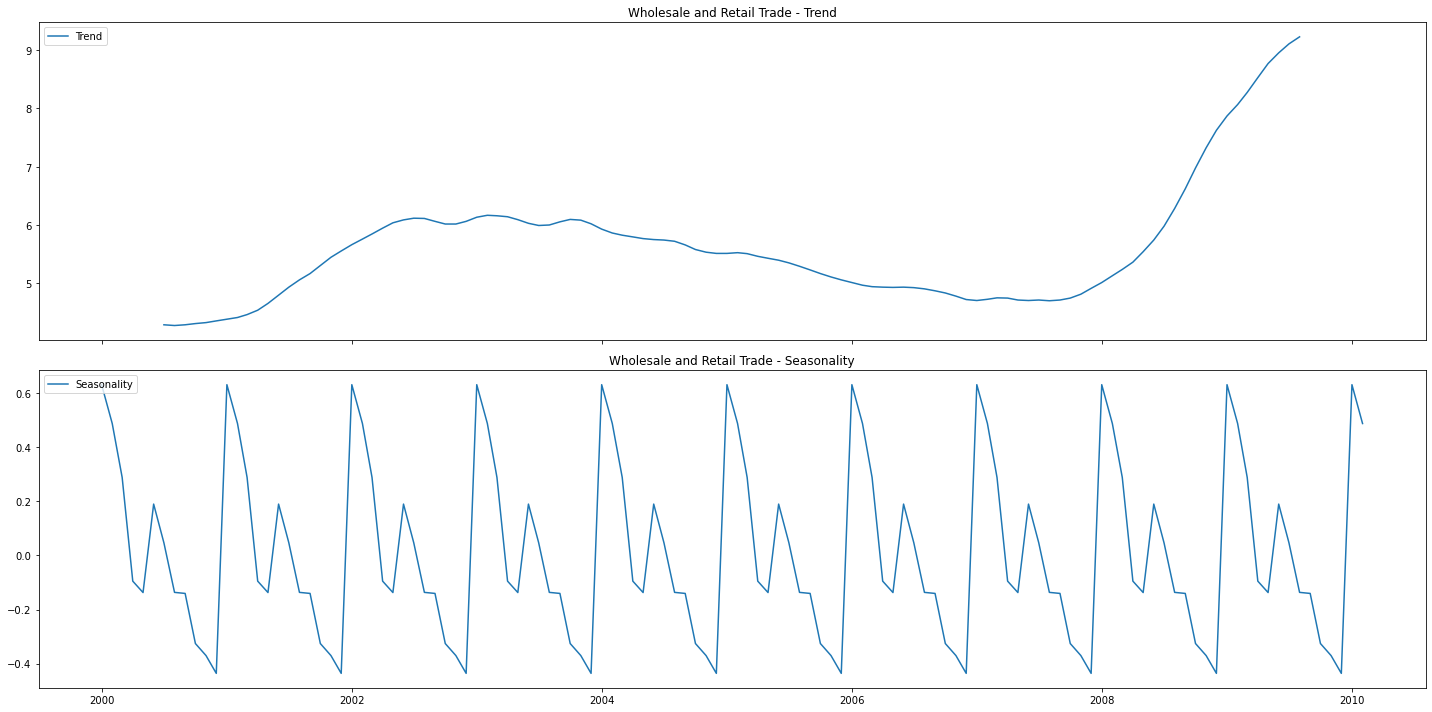

In [64]:
#5. Apply time series decomposition to your dataset to visualize the trend and seasonality .
cols = df.columns
for col in cols:
    result = seasonal_decompose(df[col], model='additive')
    fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
    axes[0].plot(result.trend, label='Trend')
    axes[0].legend(loc='upper left')
    axes[0].set_title(f'{col} - Trend')
    axes[1].plot(result.seasonal, label='Seasonality')
    axes[1].legend(loc='upper left')
    axes[1].set_title(f'{col} - Seasonality')
    plt.tight_layout()
    plt.show()

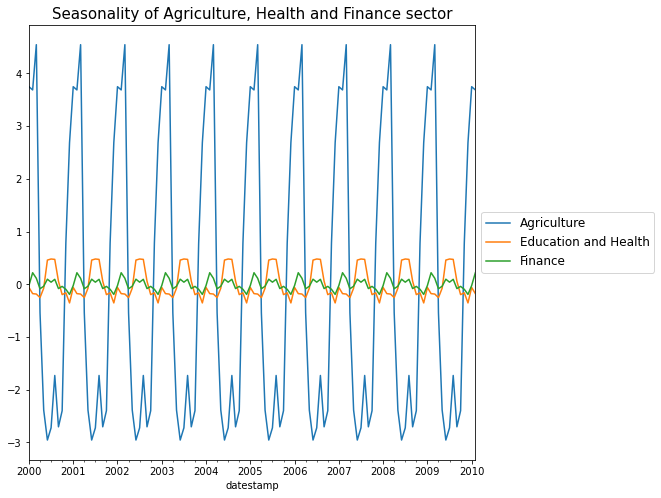

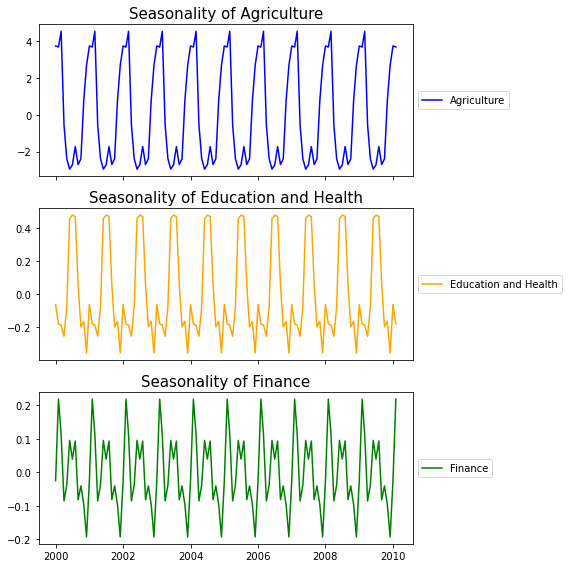

In [60]:
#6. Visualize the seasonality of Agriculture, Health and Finance sector.  
seasonal = {col: seasonal_decompose(x=df[col]).seasonal for col in ['Agriculture', 'Education and Health', 'Finance']}
seasonality_df = pd.DataFrame(seasonal)
# Plot combined seasonality
seasonality_df.plot(figsize=(8, 8))
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Seasonality of Agriculture, Health and Finance sector', fontsize=15)
plt.show()

# Plot individual seasonality
fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
axes[0].plot(seasonality_df['Agriculture'], color='blue', label='Agriculture')
axes[1].plot(seasonality_df['Education and Health'], color='orange', label='Education and Health')
axes[2].plot(seasonality_df['Finance'], color='green', label='Finance')

for ax, col in zip(axes, ['Agriculture', 'Education and Health', 'Finance']):
    ax.set_title(f'Seasonality of {col}', fontsize=15)
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

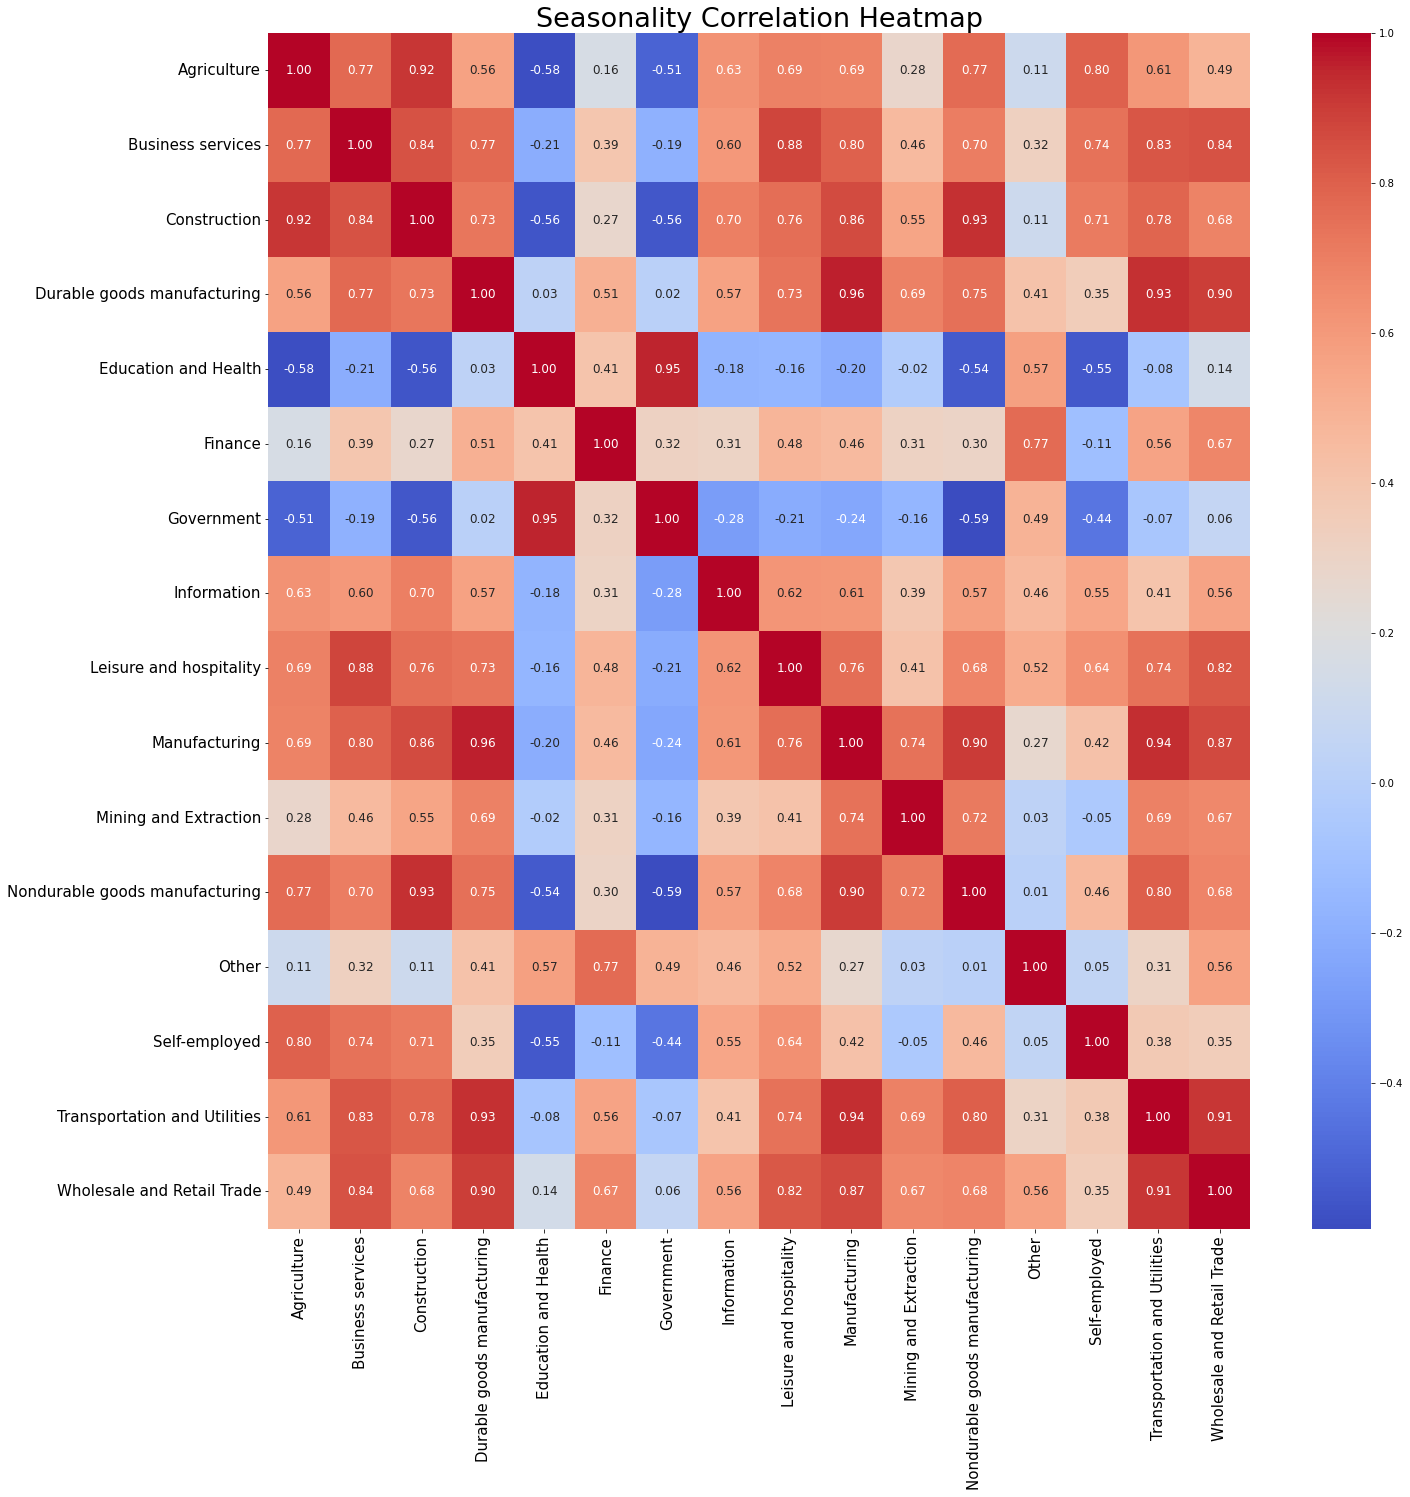

In [65]:
#Visualize the seasonality of multiple time series and the correlation between each time series in the dataset. 
seasonal_components = {col: seasonal_decompose(df[col], model='additive').seasonal for col in df.columns}
seasonality_df = pd.DataFrame(seasonal_components)
seasonality_corr = seasonality_df.corr()
plt.figure(figsize=(22, 22))
sns.heatmap(seasonality_corr, annot=True, annot_kws={"size": 12}, cmap='coolwarm', fmt='.2f')
plt.title('Seasonality Correlation Heatmap', fontsize=27)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
#exercise2


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
df=pd.read_csv('amazon_baby.csv')

In [32]:
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [33]:
#1.Check the number of the reviews received for each product
df['name'].value_counts()

Vulli Sophie the Giraffe Teether                                                                                                                                                                                                                                                                                                                       785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                                                                                                                                                                                                                                                                                    562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision                                                                                                                                                                                                                                          

In [35]:
# 2.Check the products that have more than 15 reviews. 
df['name'].value_counts().loc[lambda x: x>15]

Vulli Sophie the Giraffe Teether                                                              785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                           562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision                      561
Baby Einstein Take Along Tunes                                                                547
Cloud b Twilight Constellation Night Light, Turtle                                            520
                                                                                             ... 
Summer Infant Keep Me Clean Disposable Potty Protectors, Green/White,(Pack of 2), 10-Count     16
Vulli Products - Sophie The Giraffe Teething Ring - Gift Boxed! - 100% Natural rubber          16
Itzy Ritzy Shopping Cart and High Chair Cover, Avocado Damask                                  16
The First Years American Red Cross Deluxe Baby Healthcare and Grooming Kit                     16
Medela 100% Cotton W

In [15]:
#3.Find any missing review are present or not, If present remove those data.  
df.dropna(subset=['review'],inplace=True)
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [1]:
pip install contractions

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
#4.Clean the data and remove the special characters and replace the contractions with its expansion by converting the uppercase character to lower case. Also, remove the punctuations. 
import contractions
def expand_contractions(text):
    if isinstance(text, str):
        return contractions.fix(text)
    return text
df['review'] = df['review'].apply(expand_contractions)
df

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [4]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from textblob import TextBlob

In [19]:
#5.Add the Polarity, length of the review, the word count and average word length of each review. 
df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity if isinstance(x, str) else None)

# Review length column
df['review_len'] = df['review'].str.len().fillna(0)

# Word count column
df['word_count'] = df['review'].str.split().str.len().fillna(0)

# Average word length column
df['avg_word_len'] = df['review'].apply(
    lambda x: sum(len(word) for word in x.split()) / len(x.split()) if isinstance(x, str) and x.split() else 0
)
df

,name,review,rating,polarity,review_len,word_count,avg_word_len
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,0.083333,452.0,79.0,4.708861
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,0.367000,158.0,30.0,4.300000
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,0.293333,143.0,23.0,5.260870
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,0.318767,390.0,74.0,4.229730
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,0.803299,405.0,76.0,4.302632
...,...,...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,0.626000,138.0,27.0,4.148148
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,0.440625,354.0,64.0,4.515625
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,0.650000,93.0,17.0,4.529412
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,0.379694,854.0,170.0,4.029412


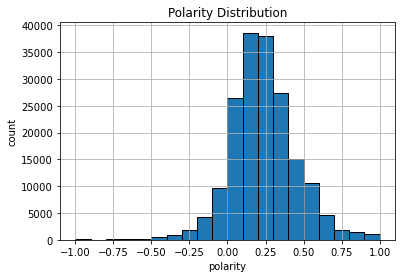

In [21]:
#6.Visualize the distribution of the word count, review length, and polarity. 
plot=df['polarity'].hist(edgecolor='k',bins=20)
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('Polarity Distribution')
plt.show()

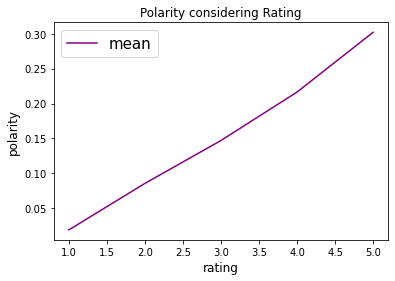

In [22]:
#7.Visualize polarity considering the rating. 
df.groupby(by='rating').polarity.agg([np.mean]).plot(color='purple')
plt.xlabel('rating',fontsize=12)
plt.ylabel('polarity',fontsize=12)
plt.title('Polarity considering Rating')
plt.legend(fontsize=15,loc='upper left')
plt.show()

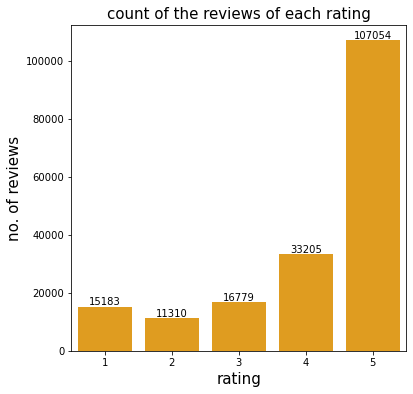

In [23]:
#8.Visualize the count of the reviews of each rating available in the dataset. 
plt.figure(figsize=(6,6))
plot=sns.countplot(x='rating',data=df,color='orange')
plt.xlabel('rating',fontsize=15)
plt.ylabel('no. of reviews',fontsize=15)
plt.title('count of the reviews of each rating',fontsize=15)
plot.bar_label(plot.containers[0])
plt.show()

In [24]:
#9.List the Top 20 products based on the polarity. 
df.sort_values(by='polarity', ascending=False).head(20)

,name,review,rating,polarity,review_len,word_count,avg_word_len
97683,"Safety 1st Screen Door Saver, White",Perfect to protect the screen from the kids an...,5,1.0,163.0,29.0,4.655172
59776,Baby Einstein Count and Compose Piano,I bought this toy for my grandson for Easter a...,5,1.0,290.0,54.0,4.388889
134261,"UPPAbaby Stroller Parent Organizer, Black",Just received this product. I wanted something...,5,1.0,174.0,25.0,6.000000
4356,SoftShells Breast Shell Soothers - Sore Nipples,This is great for sore nipples! Fits into any...,4,1.0,147.0,28.0,4.250000
111313,"Regalo Guardian Expandable Gate, White",Run don\'t walk if you need a gate because thi...,5,1.0,189.0,39.0,3.846154
109430,First Prints,Great!,5,1.0,6.0,1.0,6.000000
104169,"Luvable Friends 6 Pack Washcloths, Blue",I bought these to use in addition to my cloth ...,4,1.0,178.0,36.0,3.916667
98190,Replacement Tubing (Retail Pack of 2) for Mede...,Perfect replacement tubing for our Medela brea...,5,1.0,114.0,21.0,4.476190
144669,Ring Snuggies ~ Ring Sizer / Assorted Sizes Ad...,These are great for not having to have your ri...,5,1.0,169.0,32.0,4.312500
112918,"Snuggin Go Reversible Strap Covers, Light Pink",Perfect for our newborn! Carseat ones were too...,5,1.0,114.0,20.0,4.750000


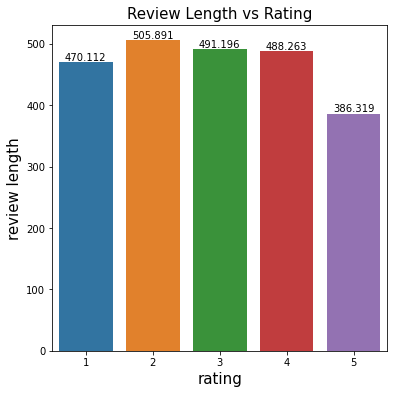

In [25]:
#10.Visualize to check whether the review length changes with rating. 
plt.figure(figsize=(6,6))
plot=sns.barplot(x='rating', y='review_len', data=df, ci=None)
plot.bar_label(plot.containers[0])
plt.xlabel('rating',fontsize=15)
plt.ylabel('review length',fontsize=15)
plt.title('Review Length vs Rating',fontsize=15)
plt.show()

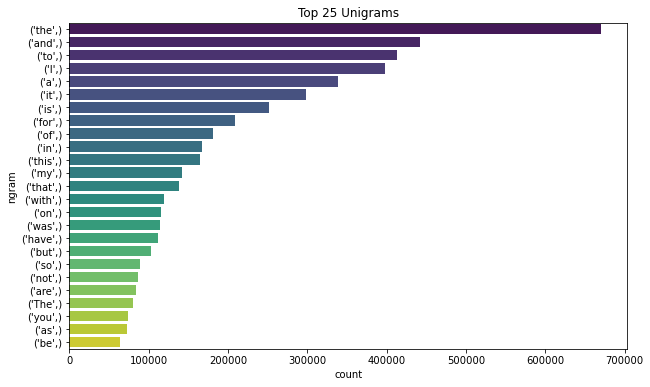

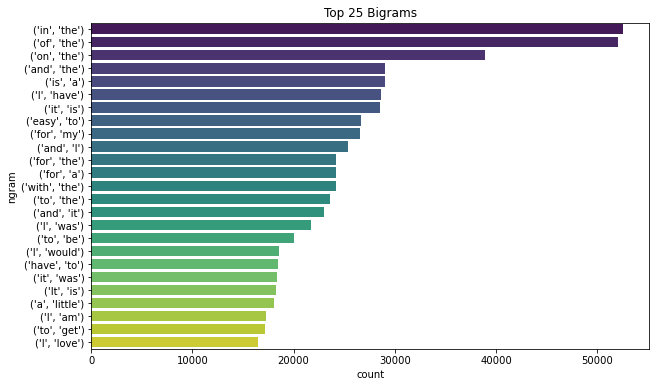

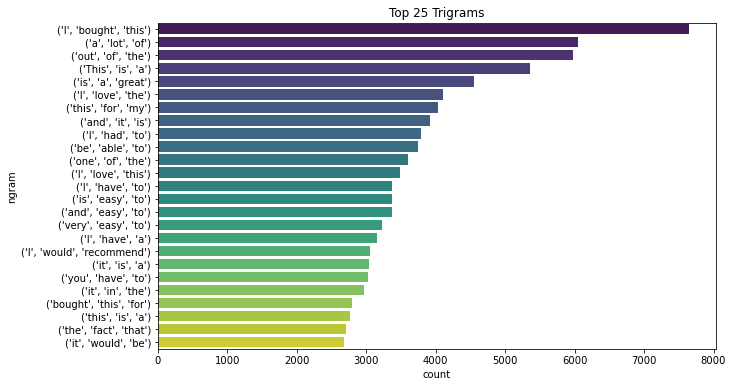

In [7]:
#11.Visualize the distribution of Top 25 Unigram, Bigram and Trigram. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk import ngrams

text_column_name = 'review'

def get_top_ngrams(texts, n=1, top_n=25):
    all_ngrams = Counter()
    for text in texts:
        if isinstance(text, str):
            n_grams = ngrams(text.split(), n)
            all_ngrams.update(n_grams)
    return all_ngrams.most_common(top_n)

# Assuming df2 is already defined
if text_column_name in df.columns:
    df[text_column_name] = df[text_column_name].astype(str).fillna('')

    top_unigrams = get_top_ngrams(df[text_column_name], n=1)
    top_bigrams = get_top_ngrams(df[text_column_name], n=2)
    top_trigrams = get_top_ngrams(df[text_column_name], n=3)

    unigram_df = pd.DataFrame(top_unigrams, columns=['ngram', 'count'])
    bigram_df = pd.DataFrame(top_bigrams, columns=['ngram', 'count'])
    trigram_df = pd.DataFrame(top_trigrams, columns=['ngram', 'count'])

    plt.figure(figsize=(10, 6))
    sns.barplot(data=unigram_df, x='count', y='ngram', palette='viridis')
    plt.title('Top 25 Unigrams')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=bigram_df, x='count', y='ngram', palette='viridis')
    plt.title('Top 25 Bigrams')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=trigram_df, x='count', y='ngram', palette='viridis')
    plt.title('Top 25 Trigrams')
    plt.show()
else:
    print(f"Column '{text_column_name}' not found in DataFrame.")
